In [ ]:
pip install fastai

In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

path = Path('map_images')

In [3]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

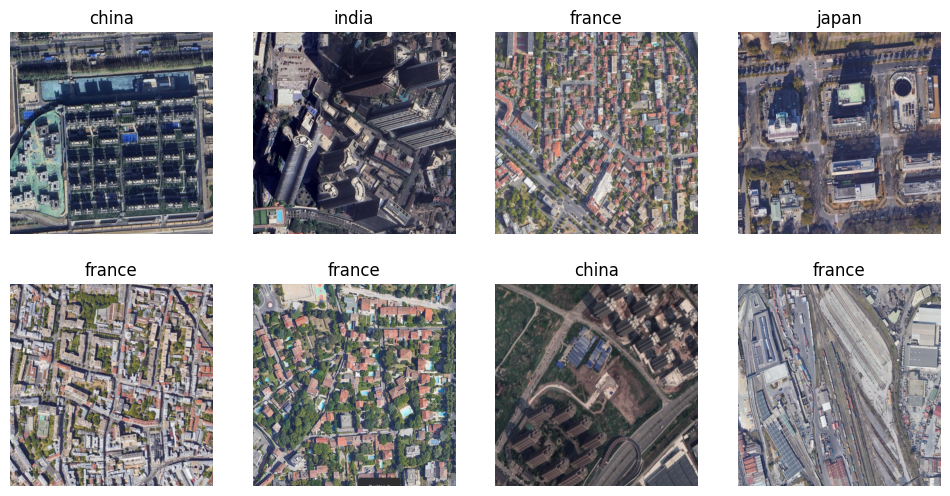

In [5]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(560, method='squish')]
    # item_tfms=RandomResizedCrop(128, min_scale=0.3)
    # item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2)
    # item_tfms=Resize(128, ResizeMethod.Squish)
    # item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')
).dataloaders(path, bs=32)

dls.show_batch(max_n=8)

In [49]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.263072,1.099817,0.437500,02:40


epoch,train_loss,valid_loss,error_rate,time
0,0.835284,0.524312,0.200000,03:26
1,0.518159,0.329319,0.125000,03:19
2,0.355702,0.333231,0.137500,03:18
3,0.253649,0.330472,0.125000,03:33
4,0.194193,0.327448,0.125000,03:27


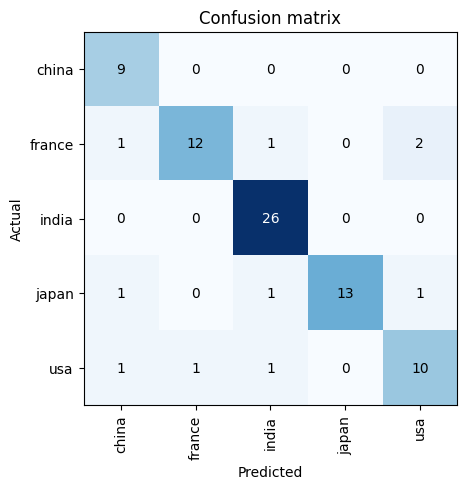

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

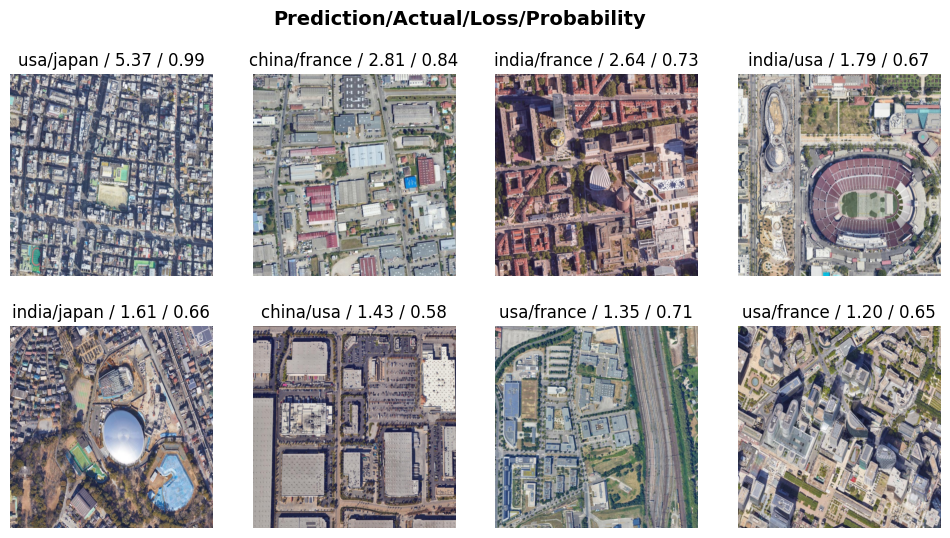

In [19]:
interp.plot_top_losses(8, nrows=2)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [6]:
learn.export('model.pkl')

In [9]:
learn = load_learner('model.pkl')

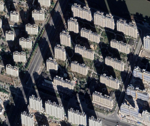

This is: china.
Probability it's china: 0.9919
Probability it's france: 0.0000
Probability it's india: 0.0021
Probability it's japan: 0.0001
Probability it's usa: 0.0058


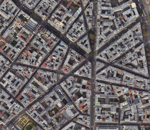

This is: france.
Probability it's china: 0.1135
Probability it's france: 0.8465
Probability it's india: 0.0187
Probability it's japan: 0.0190
Probability it's usa: 0.0024


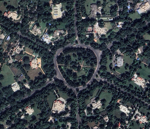

This is: india.
Probability it's china: 0.0002
Probability it's france: 0.0000
Probability it's india: 0.9998
Probability it's japan: 0.0000
Probability it's usa: 0.0000


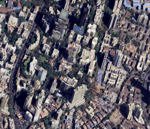

This is: india.
Probability it's china: 0.0001
Probability it's france: 0.0000
Probability it's india: 0.9998
Probability it's japan: 0.0000
Probability it's usa: 0.0001


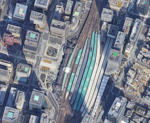

This is: japan.
Probability it's china: 0.0002
Probability it's france: 0.0082
Probability it's india: 0.0127
Probability it's japan: 0.9648
Probability it's usa: 0.0142


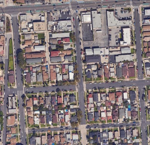

This is: usa.
Probability it's china: 0.0032
Probability it's france: 0.0061
Probability it's india: 0.0124
Probability it's japan: 0.0013
Probability it's usa: 0.9770


In [10]:
countries = 'china','france', 'india1', 'india2', 'japan', 'usa'

for coun in countries:
    dest = f'testing_images/{coun}.png'
    country,_,probs = learn.predict(dest)
    im = Image.open(dest).to_thumb(150,150)
    display(im)
    print(f"This is: {country}.")
    print(f"Probability it's china: {probs[0]:.4f}")
    print(f"Probability it's france: {probs[1]:.4f}")
    print(f"Probability it's india: {probs[2]:.4f}")
    print(f"Probability it's japan: {probs[3]:.4f}")
    print(f"Probability it's usa: {probs[4]:.4f}")
    

In [31]:
learn.dls.vocab

['china', 'france', 'india', 'japan', 'usa']